In [1]:
import torch.nn as nn
from GRU_pipeline import DataHolder, paths, dicDataset, GRUModel, pad_collate, HierarchicalDataset, Pipeline

DH = DataHolder(**paths)
#HD = HierarchicalDataset(DH)
#dl = HD.dataloader()

In [2]:
output = DH.make_train_test_datasets(test_size = .15, val_size = .17)
class_weights = output['class_weights']
openface_1  = output['datasets']['openface_1']
openface_2  = output['datasets']['openface_2']
opensmile_1 = output['datasets']['opensmile_1']
opensmile_2 = output['datasets']['opensmile_2']

Training on cpu
loss epoch 19: 1.863127
loss epoch 39: 1.752595
loss epoch 59: 1.699847
loss epoch 79: 1.620323
loss epoch 99: 1.535276


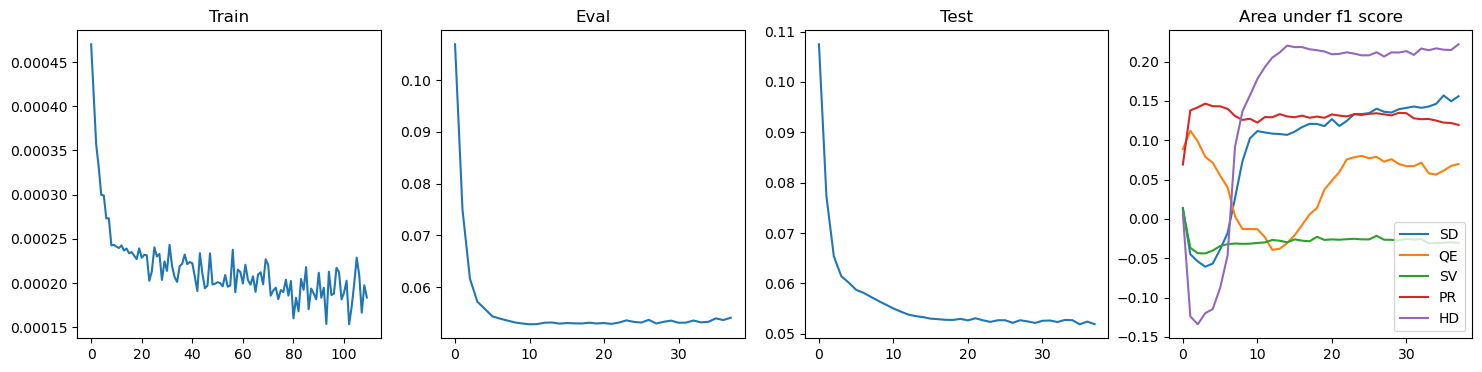

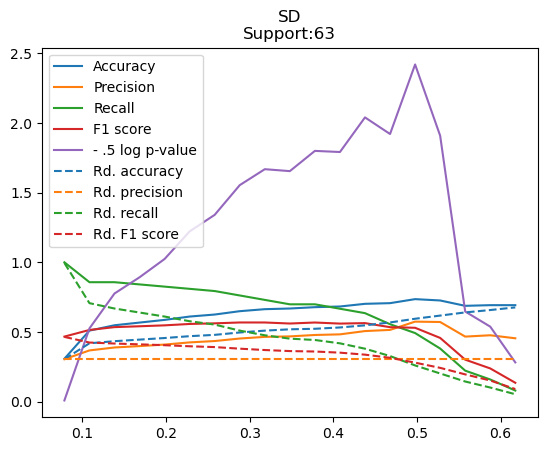

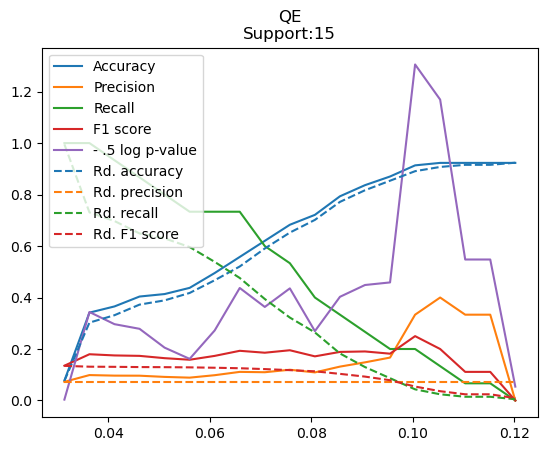

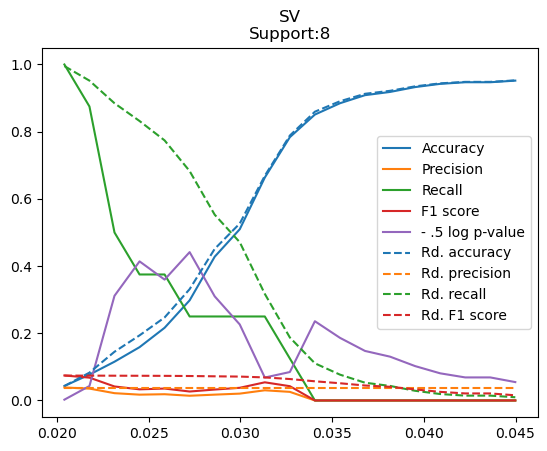

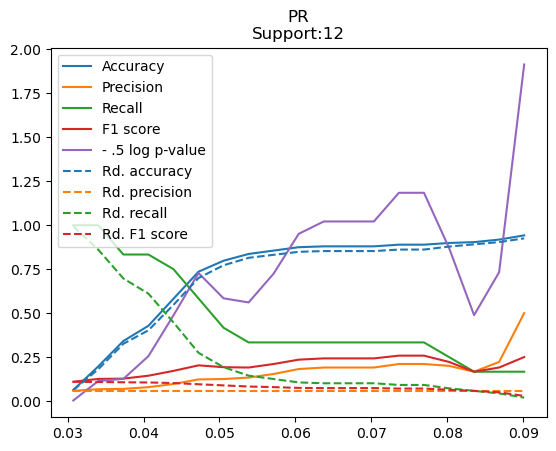

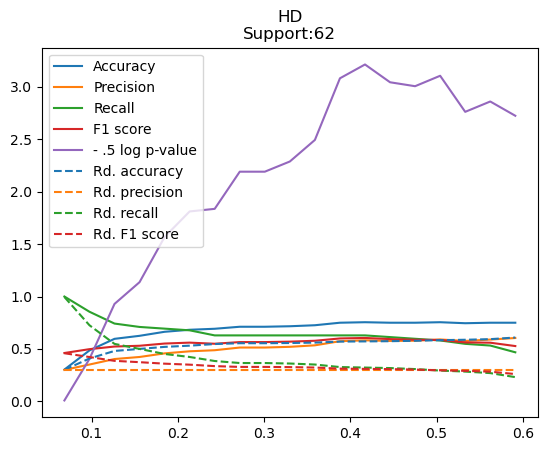

[0.1559166275089347,
 0.06975520385274905,
 -0.030534147597541444,
 0.1194168385302483,
 0.22194640708232713]

In [4]:
model_args = {
    'input_dim':17,
    'hidden_dim':8,
    'layer_dim':3,
    'output_dim':5,
    'dropout_prob':.0
}

args={
    'model': GRUModel(**model_args),
    'features_1':openface_1,
    'features_2':openface_2,
    #'features_1':opensmile_1,
    #'features_2':opensmile_2,
    'criterion':nn.MSELoss()
    #'criterion':nn.KLDivLoss(reduction='batchmean')
}
#pipe = Pipeline(**args)
pipe.train(epoch=100,lr=1e-3)
pipe.plot_losses()
pipe.eval_model(plot=True)